# Read data

from [Kaggle](https://www.kaggle.com/competitions/motorica-x-skillfactory-internship-test-task/)

In [1]:
import numpy as np
import pandas as pd
%matplotlib widget
# import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

In [9]:
# read files 
with ZipFile('../data/test_task.zip') as myzip:
    
    y_train = pd.read_csv(myzip.open('y_train.csv'))
    y_test = pd.read_csv(myzip.open('sample_submission.csv'))
    
    X_train = np.load(myzip.open('X_train.npy'))
    X_test = np.load(myzip.open('X_test.npy'))
       
        
print(X_train.shape, X_test.shape)
print(y_train.shape )

(323, 40, 100) (54, 40, 100)
(32300, 2)


In [2]:
# X_train = np.load('./X_train.npy')
# X_test = np.load('./X_test.npy')

# y_train = pd.read_csv('./y_train.csv')
# y_test = pd.read_csv('./y_test.csv')
# # y_test = pd.read_csv('./sample_submission.csv')

# print(X_train.shape, y_train.shape)
# print(X_test.shape)

(323, 40, 100) (32300, 2)
(54, 40, 100)


## Представление целевой переменной

### Kaggle-удобный вид

In [3]:
print(y_train.shape)
y_train

(32300, 2)


,sample-timestep,class
0,0-0,0
1,0-1,0
2,0-2,0
3,0-3,0
4,0-4,0
...,...,...
32295,322-95,4
32296,322-96,4
32297,322-97,4
32298,322-98,4


### Исходный вид

In [4]:
y_train[['sample_id', 'timestep']] = y_train['sample-timestep'].str.split('-', 1, expand=True).astype(int)
y_train = y_train.pivot(index='sample_id', columns='timestep', values='class')
y_train_index = y_train.index
y_train = y_train.sort_index() # на всякий случай
y_train = y_train.values

print(y_train.shape)
y_train

(323, 100)


C:\Users\Lena\AppData\Local\Temp\ipykernel_18400\2431580455.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  y_train[['sample_id', 'timestep']] = y_train['sample-timestep'].str.split('-', 1, expand=True).astype(int)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 6, 6, 6],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [7, 7, 7, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 4, 4]], dtype=int64)

### Переход от исходного вида к kaggle
Потенциально пригодится для формирования `y_test.csv`

In [5]:
df_y_train = []
for idx, arr in zip(y_train_index, y_train):
    
    series = pd.Series(arr)
    series.index = [f"{idx}-{i}" for i in series.index]
    df_y_train.append(series)
    
df_y_train = pd.concat(df_y_train)
df_y_train = df_y_train.reset_index()
df_y_train.columns = ["sample-timestep", "class"]
df_y_train

,sample-timestep,class
0,0-0,0
1,0-1,0
2,0-2,0
3,0-3,0
4,0-4,0
...,...,...
32295,322-95,4
32296,322-96,4
32297,322-97,4
32298,322-98,4


## Объяснение данных

### Train

In [6]:
X_train.shape, y_train.shape

((323, 40, 100), (323, 100))

`y_train.csv` содержит следующие классы: 
  - `0` - команда "Open";
  - `1` - команда "сгиб мизинца";
  - `2` - команда "сгиб безымянного пальца";
  - `3` - команда "сгиб среднего пальца";
  - `4` - команда "жест пистолет";
  - `5` - команда "сгиб указательного пальца";
  - `6` - команда "сгиб большога пальца";
  - `7` - команда "жест ОК";
  - `8` - команда "жест grab";¶

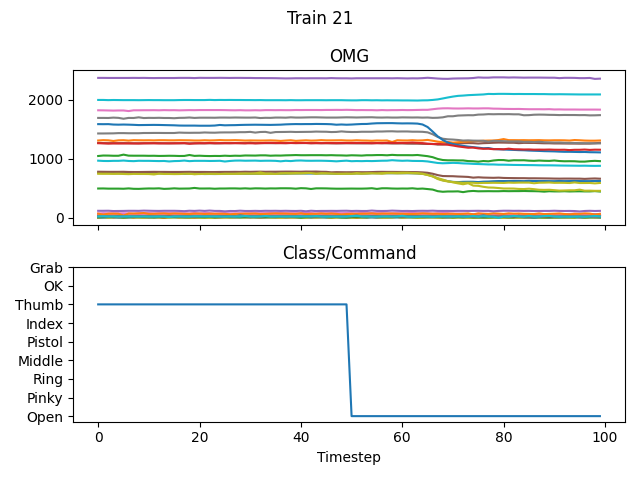

In [6]:
i = 21
fig, axx = plt.subplots(2, 1, sharex=True)
    
axx[0].plot(X_train[i].T)
axx[0].set_title('OMG')

axx[1].plot(y_train[i])
axx[1].set_title('Class/Command')
axx[1].set_xlabel('Timestep')
axx[1].set_yticks(
    np.arange(9),
    ['Open', 'Pinky', 'Ring', 'Middle', 'Pistol', 'Index', 'Thumb', 'OK', 'Grab']
)

plt.suptitle(f'Train {i}')

plt.tight_layout()

### Test

Как видно из визуализации, для теста нет целевой переменной.

Это и есть задача хакатона - предсказать, **какая команда была выполнена пользователем и в какое время**.

In [11]:
y_test[['sample_id', 'timestep']] = y_test['sample-timestep'].str.split('-', 1, expand=True).astype(int)
y_test = y_test.pivot(index='sample_id', columns='timestep', values='class')
y_test_index = y_test.index
y_test = y_test.sort_index() # на всякий случай
y_test = y_test.values

print(y_test.shape)

(54, 100)


C:\Users\Lena\AppData\Local\Temp\ipykernel_18400\1761702440.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  y_test[['sample_id', 'timestep']] = y_test['sample-timestep'].str.split('-', 1, expand=True).astype(int)


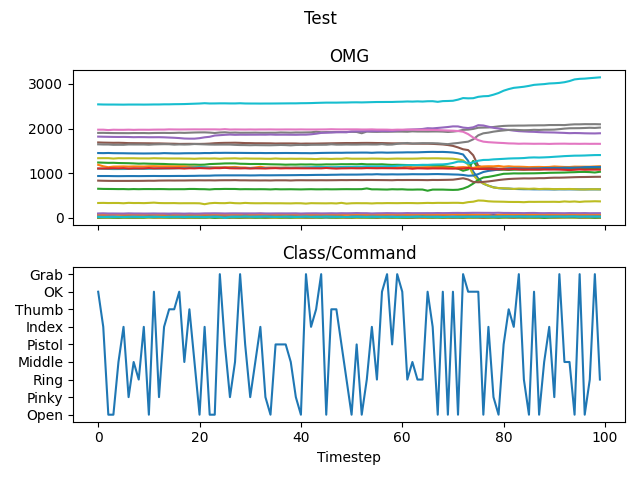

In [12]:
i = np.random.randint(y_test.shape[0])
fig, axx = plt.subplots(2, 1, sharex=True)
    
axx[0].plot(X_test[i].T)
axx[0].set_title('OMG')

axx[1].plot(y_test[i])

axx[1].set_title('Class/Command')
axx[1].set_xlabel('Timestep')
axx[1].set_yticks(
    np.arange(9),
    ['Open', 'Pinky', 'Ring', 'Middle', 'Pistol', 'Index', 'Thumb', 'OK', 'Grab']
)

plt.suptitle(f'Test')

plt.tight_layout()

# Baseline

In [9]:
y_test['class'] = 0
y_test.to_csv('./y_test_predicted.csv', index=False)
y_test

,sample-timestep,class
0,323-0,0
1,323-1,0
2,323-2,0
3,323-3,0
4,323-4,0
...,...,...
5395,376-95,0
5396,376-96,0
5397,376-97,0
5398,376-98,0
